<a href="https://colab.research.google.com/github/ahmedmohamedshaker1234/Cognorise-infotech-task1/blob/main/speech_assienment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from sklearn.preprocessing import StandardScaler
import librosa.display
import seaborn as sns
import pandas as pd

In [ ]:
def extract_mfcc_features(audio_folder, n_mfcc=13):
    """
    Extracts MFCC features from all audio files in a given folder and saves them as .npy files.

    Parameters:
    - audio_folder (str): Path to the folder containing audio files.
    - save_folder (str): Path to the folder to save extracted MFCC features.
    - n_mfcc (int): Number of MFCC features to extract.
    """
    combined_mfcc = None  # To store concatenated MFCC data
    for file_name in os.listdir(audio_folder):
        if file_name.endswith(('.wav', '.mp3')):  # Add other formats if needed
            audio_path = os.path.join(audio_folder, file_name)
            try:
                # Load the audio file
                y, sr = librosa.load(audio_path, sr=None)

                # Extract MFCC features
                mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)


                combined_mfcc = mfcc if combined_mfcc is None else np.hstack((combined_mfcc, mfcc))



            except Exception as e:
                print(f"Error processing {file_name}: {e}")
    # Save combined MFCC data in a global file to use it in the features
    if combined_mfcc is not None:
        np.save('/content/sample_data/mfcc.npy', combined_mfcc)
        print(f"Combined MFCC data saved to {'/content/sample_data/mfcc.npy'}")
    else:
        print("No audio files found or processed!")

In [ ]:
audio_folder = "/content/sample_data/clips"      # Data set path
extract_mfcc_features(audio_folder)

Combined MFCC data saved to /content/sample_data/mfcc.npy


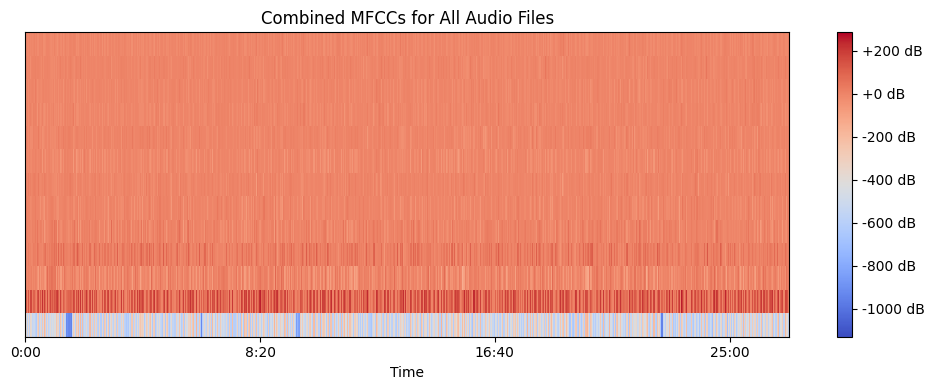

In [ ]:
# Plotting and saving combined MFCC data
mfcc = np.load('/content/sample_data/mfcc.npy')   #load combined MFCC data
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar(format="%+2.0f dB")
plt.title('Combined MFCCs for All Audio Files')
plt.tight_layout()
plt.show()